In [1]:
import pandas
import helpers
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

%matplotlib inline

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Подход 1: градиентный бустинг "в лоб"

In [1]:
X, y, X_kaggle = helpers.get_clean_data()
kf = KFold(y.size, n_folds=5, shuffle=True, random_state=42)

NameError: name 'helpers' is not defined

## Подбираем оптимальное число деревьев

In [ ]:
scores = []
nums = [10, 20, 30, 50, 100, 250]
for n in nums:
    print ('#', str(n))
    model = GradientBoostingClassifier(n_estimators=n, random_state=42)
    start_time = datetime.datetime.now()
    model_scores = cross_val_score(model, X, y, cv=kf, scoring='roc_auc', n_jobs=-1)
    print ('Time elapsed:', datetime.datetime.now() - start_time)
    print (model_scores)
    scores.append(np.mean(model_scores))

# 10
Time elapsed: 0:00:39.919522
[ 0.66383799  0.66635457  0.66360048  0.66529818  0.66516222]
# 20
Time elapsed: 0:01:05.264587
[ 0.68083889  0.68272733  0.67969876  0.6834932   0.6855512 ]
# 30
Time elapsed: 0:01:31.364884
[ 0.68892093  0.68934663  0.68712298  0.69180598  0.69283583]
# 50
Time elapsed: 0:02:25.890175
[ 0.69627399  0.69747879  0.69470891  0.69921915  0.69979097]
# 100
Time elapsed: 0:04:38.996655
[ 0.70515496  0.706077    0.70429951  0.7074682   0.70811523]
# 250


In [ ]:
plt.plot(nums, scores)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.show()

Кросс-валидация для градиентного бустинга с 30 деревьями заняла 0:00:35. Показатель метрики качества AUC-ROC в таком случае равен 0.6998.

Увеличение количества деревьев также увеличивает показатель метрики AUC-ROC, приближая его к 0.72. Для достижения большего качества имеет смысл использовать более 30 деревьев. Для ускорения обучения можно использовать не всю выборку, а некоторое ее подмножество — например, половину объектов. Также можно уменьшить глубину деревьев (max_depth).

# Подход 2: логистическая регрессия

In [1]:
import pandas
import helpers
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline

C:\Users\homka\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
X, y, X_kaggle = helpers.get_clean_data()
scaler = StandardScaler()
X = scaler.fit_transform(X)

kf = KFold(y.size, n_folds=5, shuffle=True, random_state=42)

# Подбираем оптимальный параметр регуляризации (C)

In [3]:
def plot_C_scores(C_pow_range, scores):
    plt.plot(C_pow_range, scores)
    plt.xlabel('log(C)')
    plt.ylabel('score')
    plt.show()

def test_model_C(X, y, C):
    print ('C =', str(C))
    model = LogisticRegression(C=C, random_state=42, n_jobs=-1)
    return cross_val_score(model, X, y, cv=kf, scoring='roc_auc', n_jobs=-1)
    
def test_model(X, y):
    scores = []
    C_pow_range = range(-5, 6)
    C_range = [10.0 ** i for i in C_pow_range]
    for C in C_range:
        start_time = datetime.datetime.now()
        model_scores = test_model_C(X, y, C)
        print (model_scores)
        print ('Time elapsed:', datetime.datetime.now() - start_time)       
        scores.append(np.mean(model_scores))

    plot_C_scores(C_pow_range, scores)
    
    max_score = max(scores)
    max_score_index = scores.index(max_score)
    return (C_range[max_score_index], max_score)
    

C = 1e-05
[0.6931532  0.69481539 0.69571379 0.69513159 0.69699445]
Time elapsed: 0:00:05.152442
C = 0.0001
[0.70956686 0.71039474 0.71170336 0.71176082 0.71336295]
Time elapsed: 0:00:05.703323
C = 0.001
[0.71449541 0.71577214 0.71625974 0.71697301 0.71831738]
Time elapsed: 0:00:07.240814
C = 0.01
[0.71464598 0.71617915 0.71624749 0.71735041 0.71832832]
Time elapsed: 0:00:08.337196
C = 0.1
[0.71462192 0.71617479 0.71619187 0.71737596 0.7182712 ]
Time elapsed: 0:00:08.727663
C = 1.0
[0.71461815 0.71617185 0.71618338 0.7173762  0.71826341]
Time elapsed: 0:00:08.706809
C = 10.0
[0.71461695 0.71617179 0.71618281 0.71737669 0.7182632 ]
Time elapsed: 0:00:08.844296
C = 100.0
[0.71461692 0.71617206 0.71618249 0.71737655 0.71826345]
Time elapsed: 0:00:09.095133
C = 1000.0
[0.71461693 0.71617214 0.7161825  0.71737659 0.71826346]
Time elapsed: 0:00:08.732762
C = 10000.0
[0.71461693 0.71617215 0.71618251 0.7173766  0.71826345]
Time elapsed: 0:00:08.781251
C = 100000.0
[0.71461693 0.71617215 0.7161

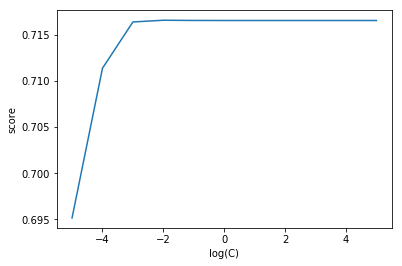

In [9]:
C, score = test_model(X, y)

In [10]:
print (C)
print (score)

0.01
0.7165502697259141


Наилучшее значение показателя AUC-ROC достигается при C = 0.01 и равно 0.716. Это сравнимо с градиентным бустингом по 250 деревьям, при этом логистическая регрессия работает заметно быстрее.

# Удаление категориальных признаков

In [4]:
X, y, X_kaggle = helpers.get_clean_data('clean_category')
scaler = StandardScaler()
X = scaler.fit_transform(X)

kf = KFold(y.size, n_folds=5, shuffle=True, random_state=42)

C = 1e-05
[0.69301063 0.69476367 0.69562225 0.69507488 0.69702952]
Time elapsed: 0:00:05.114114
C = 0.0001
[0.70936502 0.71042199 0.71168956 0.71168269 0.71353648]
Time elapsed: 0:00:05.521705
C = 0.001
[0.71434804 0.71581532 0.71629769 0.7168852  0.71853275]
Time elapsed: 0:00:06.947262
C = 0.01
[0.71450425 0.71622052 0.71627999 0.71725088 0.71854131]
Time elapsed: 0:00:07.957235
C = 0.1
[0.71448206 0.71620992 0.71622569 0.71726917 0.71848436]
Time elapsed: 0:00:08.322997
C = 1.0
[0.71447768 0.71620627 0.7162209  0.71727019 0.71847678]
Time elapsed: 0:00:08.465044
C = 10.0
[0.71447669 0.71620645 0.71621968 0.71727123 0.71847581]
Time elapsed: 0:00:08.382008
C = 100.0
[0.7144767  0.71620624 0.71621963 0.71727119 0.71847569]
Time elapsed: 0:00:08.351539
C = 1000.0
[0.71447667 0.71620624 0.71621965 0.71727119 0.71847569]
Time elapsed: 0:00:08.401482
C = 10000.0
[0.71447668 0.71620627 0.71621961 0.71727117 0.71847569]
Time elapsed: 0:00:08.493266
C = 100000.0
[0.71447668 0.71620627 0.7162

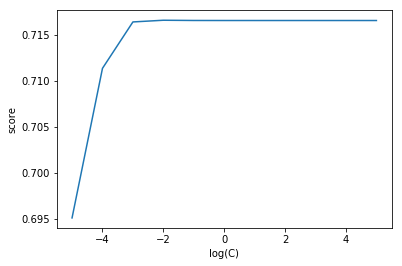

In [5]:
C, score = test_model(X, y)

In [6]:
print (C)
print (score)

0.01
0.7165593885630225


Удаление категориальных признаков не повлияло на качество предсказания. Наилучшее значение показателя AUC-ROC так же достигается при C = 0.01 и равно 0.716. Получается, что в предыдущей модели эти признаки никак не влияли на результат предсказания, модель смогла распознать этот шум.

# "Мешок слов" для кодирования информации о героях.

In [7]:
X, y, X_kaggle = helpers.get_clean_data('clean_category')
X_hero, _y, X_kaggle_hero = helpers.get_clean_data('hero_bag')

scaler = StandardScaler()
X = pandas.DataFrame(scaler.fit_transform(X), index = X.index)
X_kaggle = pandas.DataFrame(scaler.transform(X_kaggle), index = X_kaggle.index)

X = pandas.concat([X, X_hero], axis=1)
X_kaggle = pandas.concat([X_kaggle, X_kaggle_hero], axis=1)

kf = KFold(y.size, n_folds=5, shuffle=True, random_state=42)

C = 1e-05
[0.69720207 0.69884021 0.69957686 0.69934071 0.70112123]
Time elapsed: 0:00:06.190490
C = 0.0001
[0.72359118 0.72409682 0.72469067 0.72599494 0.72698389]
Time elapsed: 0:00:06.712623
C = 0.001
[0.74465332 0.74667772 0.74413152 0.74880233 0.74740586]
Time elapsed: 0:00:08.680691
C = 0.01
[0.74947407 0.75279102 0.7492512  0.75538896 0.75178335]
Time elapsed: 0:00:11.602126
C = 0.1
[0.74943218 0.75315601 0.74950643 0.7559819  0.75166068]
Time elapsed: 0:00:14.259939
C = 1.0
[0.74936295 0.75316822 0.74949775 0.75602112 0.75158796]
Time elapsed: 0:00:14.403098
C = 10.0
[0.74935121 0.75317095 0.74949831 0.75602517 0.75158   ]
Time elapsed: 0:00:14.647511
C = 100.0
[0.74935011 0.75317056 0.74949869 0.75602547 0.75157877]
Time elapsed: 0:00:14.807832
C = 1000.0
[0.74934946 0.75317052 0.74949877 0.75602565 0.75157867]
Time elapsed: 0:00:15.167250
C = 10000.0
[0.74934982 0.75317055 0.74949872 0.75602524 0.7515786 ]
Time elapsed: 0:00:14.785746
C = 100000.0
[0.74935058 0.7531704  0.7494

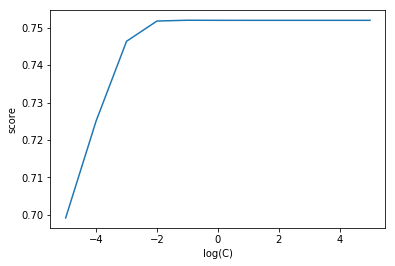

In [8]:
C, score = test_model(X, y)

In [9]:
print (C)
print (score)

0.1
0.7519474413465284


После добавления "мешка слов" по героям качество заметно улучшилось. Наилучшее значение показателя AUC-ROC достигается при C = 0.1 и равно 0.752. Это объясняется тем, что вместо отсутствия данных о героях или случайного шума из id мы имеем осмысленную разреженную матрицу для построения предсказания.